In [1]:
import datetime as dt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
#import urllib
from subprocess import call
import glob
import os
import os.path
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pickle

import urllib.request, urllib.error, urllib.parse
from urllib.request import Request, urlopen
from urllib.error import URLError
# #import urllib
import os
from bs4 import BeautifulSoup

In [2]:
#!jupyter nbconvert --to script TexasWindProfile.ipynb

In [32]:
PLOT_FLAG = True
cwd = os.getcwd()


In [20]:
# A function to download zip files
#Author: Bellerophon_
#Date Created: 04/12/15
#Usage: Used to scrape a website for links that end in .zip and list them
#Requirements: BeautifulSoup lib
#Notes: 

def DownloadZipFiles(_url,_dlurl):
    #Create a new directory to put the files into
    #Get the current working directory and create a new directory in it named test
    #cwd = os.getcwd()
    dirname = 'TexasWind'
    newdir = cwd + '/'+ dirname
    print(("The current Working directory is " + cwd))
    newfile = open(newdir+'/zipfiles.txt','w')
    print(newfile)


    print("Downloading.. ")
    #Set variable for page to be open and url to be concatenated 
    url = _url
    dlurl = _dlurl
    page = urllib.request.urlopen(dlurl).read()

    #File extension to be looked for. 
    extension = ".zip"

    #Use BeautifulSoup to clean up the page
    soup = BeautifulSoup(page,"lxml")
    soup.prettify()

    #Find all the links on the page that end in .zip
    for anchor in soup.findAll('a', href=True):
        links = url + anchor['href']
        if True:#links.endswith(extension):
            newfile.write(links + '\n')
    newfile.close()

    #Read what is saved in zipfiles.txt and output it to the user
    #This is done to create presistent data 
    newfile = open(newdir+'/zipfiles.txt', 'r')
    #for line in newfile:
    #    print line
    newfile.close()

    #Read through the lines in the text file and download the zip files.
    #Handle exceptions and print exceptions to the console
    with open(newdir+'/zipfiles.txt', 'r') as url:
        for line in url:
            if line:
                try:
                    ziplink = line
                    #Removes the first 48 characters of the url to get the name of the file
                    #zipfile = line[48:]
                    #Removes the last 4 characters to remove the .zip
                    #zipfile2 = zipfile[:3]
                    #print("Trying to reach " + ziplink)
                    response = urllib.request.urlopen(ziplink)
                except URLError as e:
                    if hasattr(e, 'reason'):
                        print('We failed to reach a server.')
                        print(('Reason: ', e.reason))
                        continue
                    elif hasattr(e, 'code'):
                        print('The server couldn\'t fulfill the request.')
                        print(('Error code: ', e.code))
                        continue
                else:
                    zipcontent = response.read()
                    zipName = response.info()['Content-Disposition'] 
                    zipName=zipName[21:]
                    completeName = os.path.join(newdir, zipName)
                    with open (completeName, 'wb') as f:
                        print(("downloading.. " + zipName))
                        f.write(zipcontent)
                        f.close()
    print("Script completed")

# Wind data

In [21]:
# Download files
DownloadZipFiles('http://mis.ercot.com','http://mis.ercot.com/misapp/GetReports.do?reportTypeId=13028&reportTitle=Wind%20Power%20Production%20-%20Hourly%20Averaged%20Actual%20and%20Forecasted%20Values&showHTMLView=&mimicKey')


The current Working directory is /home/frossi/Documents/PhD/pamod/case_studies/Dallas_Fort-Worth/Data/power_network/renewables
<_io.TextIOWrapper name='/home/frossi/Documents/PhD/pamod/case_studies/Dallas_Fort-Worth/Data/power_network/renewables/TexasWind/zipfiles.txt' mode='w' encoding='UTF-8'>
Downloading.. 
downloading.. cdr.00013028.0000000000000000.20191113.155634920.WPPHRLYAVGACTNP4732_csv.zip
downloading.. cdr.00013028.0000000000000000.20191113.155634859.WPPHRLYAVGACTNP4732_xml.zip
downloading.. cdr.00013028.0000000000000000.20191113.145632473.WPPHRLYAVGACTNP4732_csv.zip
downloading.. cdr.00013028.0000000000000000.20191113.145632402.WPPHRLYAVGACTNP4732_xml.zip
downloading.. cdr.00013028.0000000000000000.20191113.135634287.WPPHRLYAVGACTNP4732_csv.zip
downloading.. cdr.00013028.0000000000000000.20191113.135634231.WPPHRLYAVGACTNP4732_xml.zip
downloading.. cdr.00013028.0000000000000000.20191113.125627580.WPPHRLYAVGACTNP4732_csv.zip
downloading.. cdr.00013028.0000000000000000.2019111

downloading.. cdr.00013028.0000000000000000.20191111.205637681.WPPHRLYAVGACTNP4732_xml.zip
downloading.. cdr.00013028.0000000000000000.20191111.195640784.WPPHRLYAVGACTNP4732_csv.zip
downloading.. cdr.00013028.0000000000000000.20191111.195640725.WPPHRLYAVGACTNP4732_xml.zip
downloading.. cdr.00013028.0000000000000000.20191111.185621029.WPPHRLYAVGACTNP4732_csv.zip
downloading.. cdr.00013028.0000000000000000.20191111.185620961.WPPHRLYAVGACTNP4732_xml.zip
downloading.. cdr.00013028.0000000000000000.20191111.175630405.WPPHRLYAVGACTNP4732_csv.zip
downloading.. cdr.00013028.0000000000000000.20191111.175630328.WPPHRLYAVGACTNP4732_xml.zip
downloading.. cdr.00013028.0000000000000000.20191111.165632460.WPPHRLYAVGACTNP4732_csv.zip
downloading.. cdr.00013028.0000000000000000.20191111.165632411.WPPHRLYAVGACTNP4732_xml.zip
downloading.. cdr.00013028.0000000000000000.20191111.155629058.WPPHRLYAVGACTNP4732_csv.zip
downloading.. cdr.00013028.0000000000000000.20191111.155628988.WPPHRLYAVGACTNP4732_xml.zip

In [70]:
# Data from http://mis.ercot.com/misapp/GetReports.do?reportTypeId=12311&reportTitle=Seven-Day%20Load%20Forecast%20by%20Forecast%20Zone&showHTMLView=&mimicKey
#  via http://www.ercot.com/gridinfo/generation

#Unzip all files that end in csv.zip
zipfilenamepattern = os.path.join(cwd,'/TexasWind/*WPP*_csv.zip')
zipfilenames = glob.glob(zipfilenamepattern)
unzip_folder = cwd+'TexasWind/'
for zipfilename in zipfilenames:
    if not os.path.exists(zipfilename[:-8]+'.csv'): 
        call(['unzip','-n',zipfilename,'-d',unzip_folder])

csvfilenamepattern = cwd+'TexasWind/cdr.*WPP*.csv'
csvfilenamepattern = glob.glob(csvfilenamepattern)
print(csvfilenamepattern[0], len(csvfilenamepattern))

/home/frossi/Documents/PhD/pamod/case_studies/Dallas_Fort-Worth/Data/power_network/renewablesTexasWind/cdr.00013028.0000000000000000.20191110.175621.WPPHRLYAVGACTNP4732.csv 88


In [40]:
#Read all CSVs in a Pandas notebook

HourlyWinds=pd.DataFrame()

for csvname in csvfilenamepattern:
    HourlyWind=pd.read_csv(csvname)
    HourlyWinds=HourlyWinds.append(HourlyWind,ignore_index=True)

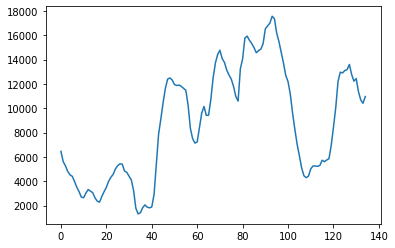

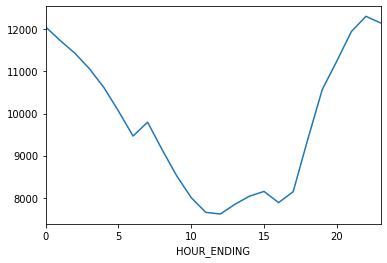

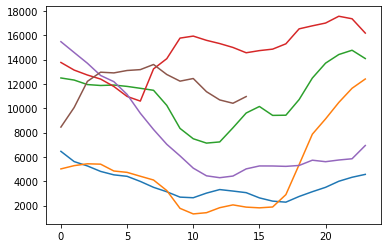

In [41]:
#Create an index for time 
HourlyWinds = HourlyWinds.dropna(axis=0,how='any',subset=['ACTUAL_SYSTEM_WIDE'])
HourlyWinds.HOUR_ENDING=HourlyWinds.HOUR_ENDING-1

SortedHourlyWinds=HourlyWinds.groupby(['DELIVERY_DATE','HOUR_ENDING']).mean()

AvgHourlyWinds=HourlyWinds.groupby(['HOUR_ENDING']).mean()
if PLOT_FLAG:
    plt.figure()
    plt.plot(SortedHourlyWinds['ACTUAL_SYSTEM_WIDE'].values)

    plt.figure()

    AvgHourlyWinds['ACTUAL_SYSTEM_WIDE'].plot()
    plt.figure()
    for myday in HourlyWinds['DELIVERY_DATE'].unique():
        daywinds=SortedHourlyWinds.loc[myday]
        plt.plot(daywinds['ACTUAL_SYSTEM_WIDE'].values)

In [42]:

HourlyWinds['ts']=HourlyWinds.DELIVERY_DATE+' '+HourlyWinds.HOUR_ENDING.map(str)+':00'
HourlyWinds['ts']

HourlyWinds['ts']=pd.to_datetime(HourlyWinds['ts'])
HourlyWinds.set_index(['ts'],inplace=True)
#pd.to_datetime(HourlyWinds['DELIVERY_DATE'],HourlyWinds['HOUR_ENDING'])

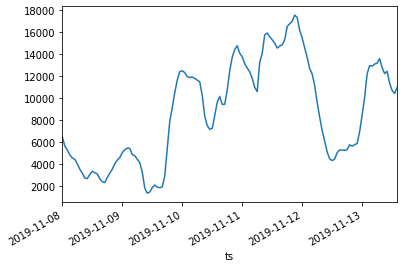

In [43]:
if PLOT_FLAG:
    HourlyWinds['ACTUAL_SYSTEM_WIDE'].plot()

In [44]:
np.save(os.path.join(cwd,'TexasAvgWindProfile.npy'),AvgHourlyWinds['ACTUAL_SYSTEM_WIDE'])

In [45]:
AvgHourlyWinds['ACTUAL_SYSTEM_WIDE']

HOUR_ENDING
0     12054.860398
1     11732.651136
2     11433.626761
3     11066.089545
4     10616.976761
5     10059.969886
6      9467.731193
7      9796.146057
8      9142.612557
9      8523.871029
10     8003.782443
11     7655.901364
12     7617.611023
13     7848.192614
14     8040.804886
15     8153.255909
16     7887.978920
17     8146.016023
18     9385.178125
19    10570.645455
20    11247.201023
21    11946.379545
22    12307.253352
23    12151.892727
Name: ACTUAL_SYSTEM_WIDE, dtype: float64

# Solar data

In [46]:
#Download solar data
DownloadZipFiles('http://mis.ercot.com','http://mis.ercot.com/misapp/GetReports.do?reportTypeId=13483&reportTitle=Solar%20Power%20Production%20-%20Hourly%20Averaged%20Actual%20and%20Forecasted%20Values&showHTMLView=&mimicKey')

The current Working directory is /home/frossi/Documents/PhD/pamod/case_studies/Dallas_Fort-Worth/Data/power_network/renewables
<_io.TextIOWrapper name='/home/frossi/Documents/PhD/pamod/case_studies/Dallas_Fort-Worth/Data/power_network/renewables/TexasWind/zipfiles.txt' mode='w' encoding='UTF-8'>
Downloading.. 
downloading.. cdr.00013483.0000000000000000.20191113.165621045.PVGRHRLYAVGACTNP4737_csv.zip
downloading.. cdr.00013483.0000000000000000.20191113.165620986.PVGRHRLYAVGACTNP4737_xml.zip
downloading.. cdr.00013483.0000000000000000.20191113.155615744.PVGRHRLYAVGACTNP4737_csv.zip
downloading.. cdr.00013483.0000000000000000.20191113.155615683.PVGRHRLYAVGACTNP4737_xml.zip
downloading.. cdr.00013483.0000000000000000.20191113.145627385.PVGRHRLYAVGACTNP4737_csv.zip
downloading.. cdr.00013483.0000000000000000.20191113.145627318.PVGRHRLYAVGACTNP4737_xml.zip
downloading.. cdr.00013483.0000000000000000.20191113.135618615.PVGRHRLYAVGACTNP4737_csv.zip
downloading.. cdr.00013483.0000000000000000.

downloading.. cdr.00013483.0000000000000000.20191111.215620748.PVGRHRLYAVGACTNP4737_xml.zip
downloading.. cdr.00013483.0000000000000000.20191111.205632499.PVGRHRLYAVGACTNP4737_csv.zip
downloading.. cdr.00013483.0000000000000000.20191111.205632436.PVGRHRLYAVGACTNP4737_xml.zip
downloading.. cdr.00013483.0000000000000000.20191111.195633017.PVGRHRLYAVGACTNP4737_csv.zip
downloading.. cdr.00013483.0000000000000000.20191111.195632959.PVGRHRLYAVGACTNP4737_xml.zip
downloading.. cdr.00013483.0000000000000000.20191111.185629659.PVGRHRLYAVGACTNP4737_csv.zip
downloading.. cdr.00013483.0000000000000000.20191111.185629611.PVGRHRLYAVGACTNP4737_xml.zip
downloading.. cdr.00013483.0000000000000000.20191111.175624491.PVGRHRLYAVGACTNP4737_csv.zip
downloading.. cdr.00013483.0000000000000000.20191111.175624445.PVGRHRLYAVGACTNP4737_xml.zip
downloading.. cdr.00013483.0000000000000000.20191111.165616384.PVGRHRLYAVGACTNP4737_csv.zip
downloading.. cdr.00013483.0000000000000000.20191111.165616330.PVGRHRLYAVGACTNP4

downloading.. cdr.00013483.0000000000000000.20191110.005643018.PVGRHRLYAVGACTNP4737_xml.zip
Script completed


In [47]:

#Extract
zipfilenamepattern = os.path.join(cwd,'TexasWind/cdr.*.PVG*_csv.zip')
zipfilenames = glob.glob(zipfilenamepattern)
for zipfilename in zipfilenames:
    if not os.path.exists(zipfilename[:-8]+'.csv'): 
        call(['unzip','-n',zipfilename,'-d',unzip_folder])

csvfilenamepattern = cwd+'TexasWind/cdr.*PVG*.csv'
csvfilenamepattern = glob.glob(csvfilenamepattern)
print (csvfilenamepattern[0], len(csvfilenamepattern))

/home/frossi/Documents/PhD/pamod/case_studies/Dallas_Fort-Worth/Data/power_network/renewablesTexasWind/cdr.00013483.0000000000000000.20191111.055617.PVGRHRLYAVGACTNP4737.csv 89


In [48]:
#Read all CSVs in a Pandas notebook

HourlySun=pd.DataFrame()
for csvname in csvfilenamepattern:
    #print csvname
    HourlySunT=pd.read_csv(csvname)
    HourlySun=HourlySun.append(HourlySunT,ignore_index=True)


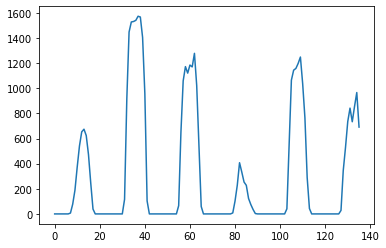

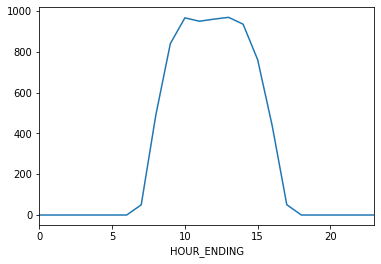

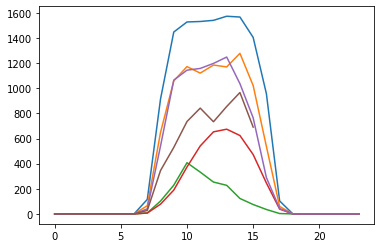

In [49]:
#Create an index for time 
HourlySun = HourlySun.dropna(axis=0,how='any',subset=['ACTUAL_SYSTEM_WIDE'])
HourlySun.HOUR_ENDING=HourlySun.HOUR_ENDING-1

SortedHourlySun=HourlySun.groupby(['DELIVERY_DATE','HOUR_ENDING']).mean()
AvgHourlySun=HourlySun.groupby(['HOUR_ENDING']).mean()

if PLOT_FLAG:
    plt.figure()
    plt.plot(SortedHourlySun['ACTUAL_SYSTEM_WIDE'].values)

    plt.figure()
    AvgHourlySun['ACTUAL_SYSTEM_WIDE'].plot()
    plt.figure()
    for myday in HourlySun['DELIVERY_DATE'].unique():
        daysun=SortedHourlySun.loc[myday]
        plt.plot(daysun['ACTUAL_SYSTEM_WIDE'].values)

In [50]:

HourlySun['ts']=HourlySun.DELIVERY_DATE+' '+HourlySun.HOUR_ENDING.map(str)+':00'
HourlySun['ts']

HourlySun['ts']=pd.to_datetime(HourlySun['ts'])
HourlySun.set_index(['ts'],inplace=True)

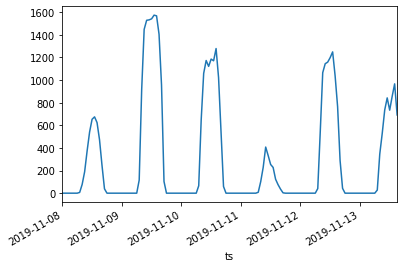

In [51]:
if PLOT_FLAG:
    HourlySun['ACTUAL_SYSTEM_WIDE'].plot()

In [52]:
HourlySun

,DELIVERY_DATE,HOUR_ENDING,ACTUAL_SYSTEM_WIDE,COP_HSL_SYSTEM_WIDE,STPPF_SYSTEM_WIDE,PVGRPP_SYSTEM_WIDE,DSTFlag
ts,,,,,,,
2019-11-09 05:00:00,11/09/2019,5,0.00,0.0,0.0,0.0,N
2019-11-09 06:00:00,11/09/2019,6,0.01,0.0,0.0,0.0,N
2019-11-09 07:00:00,11/09/2019,7,115.86,59.1,65.4,37.6,N
2019-11-09 08:00:00,11/09/2019,8,914.62,532.1,573.8,409.3,N
2019-11-09 09:00:00,11/09/2019,9,1447.12,1009.3,1301.3,889.1,N
...,...,...,...,...,...,...,...
2019-11-12 01:00:00,11/12/2019,1,0.00,0.0,0.0,0.0,N
2019-11-12 02:00:00,11/12/2019,2,0.00,0.0,0.0,0.0,N
2019-11-12 03:00:00,11/12/2019,3,0.01,0.0,0.0,0.0,N


In [54]:
np.save(os.path.join(cwd,'TexasAvgSunProfile.npy'),AvgHourlySun['ACTUAL_SYSTEM_WIDE'])

## Load Data by weather region

In [55]:
DownloadZipFiles('http://mis.ercot.com','http://mis.ercot.com/misapp/GetReports.do?reportTypeId=13101&reportTitle=Actual%20System%20Load%20by%20Weather%20Zone&showHTMLView=&mimicKey')

The current Working directory is /home/frossi/Documents/PhD/pamod/case_studies/Dallas_Fort-Worth/Data/power_network/renewables
<_io.TextIOWrapper name='/home/frossi/Documents/PhD/pamod/case_studies/Dallas_Fort-Worth/Data/power_network/renewables/TexasWind/zipfiles.txt' mode='w' encoding='UTF-8'>
Downloading.. 
downloading.. cdr.00013101.0000000000000000.20191113.055000745.ACTUALSYSLOADWZNP6345_csv.zip
downloading.. cdr.00013101.0000000000000000.20191113.055000681.ACTUALSYSLOADWZNP6345_xml.zip
downloading.. cdr.00013101.0000000000000000.20191112.055000812.ACTUALSYSLOADWZNP6345_csv.zip
downloading.. cdr.00013101.0000000000000000.20191112.055000739.ACTUALSYSLOADWZNP6345_xml.zip
downloading.. cdr.00013101.0000000000000000.20191111.055000810.ACTUALSYSLOADWZNP6345_csv.zip
downloading.. cdr.00013101.0000000000000000.20191111.055000761.ACTUALSYSLOADWZNP6345_xml.zip
downloading.. cdr.00013101.0000000000000000.20191110.055001024.ACTUALSYSLOADWZNP6345_csv.zip
downloading.. cdr.00013101.0000000000

In [56]:
# Data from http://mis.ercot.com/misapp/GetReports.do?reportTypeId=12311&reportTitle=Seven-Day%20Load%20Forecast%20by%20Forecast%20Zone&showHTMLView=&mimicKey
#  via http://www.ercot.com/gridinfo/generation

#Unzip all files that end in csv.zip
zipfilenamepattern = os.path.join(cwd,'TexasWind/*ACTUALSYSLOAD*_csv.zip')
zipfilenames = glob.glob(zipfilenamepattern)
unzip_folder = os.path.join(cwd,'TexasWind/')
for zipfilename in zipfilenames:
    if not os.path.exists(zipfilename[:-8]+'.csv'): 
        call(['unzip','-n',zipfilename,'-d',unzip_folder])

In [58]:
csvfilenamepattern = os.path.join(cwd,'TexasWind/cdr.*ACTUALSYSLOAD*.csv')
csvfilenamepattern = glob.glob(csvfilenamepattern)
print (csvfilenamepattern[0], len(csvfilenamepattern))

/home/frossi/Documents/PhD/pamod/case_studies/Dallas_Fort-Worth/Data/power_network/renewables/TexasWind/cdr.00013101.0000000000000000.20191026.055000.ACTUALSYSLOADWZNP6345.csv 32


In [59]:
#Read all CSVs in a Pandas notebook

HourlyLoad=pd.DataFrame()
for csvname in csvfilenamepattern:
    #print csvname
    HourlyLoadT=pd.read_csv(csvname)
    HourlyLoad=HourlyLoad.append(HourlyLoadT,ignore_index=True)


In [60]:
#Create an index for time 
HourlyLoad = HourlyLoad.dropna(axis=0,how='any',subset=['TOTAL'])
HourlyLoad['HourEndingStr']=HourlyLoad['HourEnding']
def HourStrToNum(_hstr):
    return int(_hstr[:2])
HourlyLoad.HourEnding=HourlyLoad.HourEndingStr.apply(HourStrToNum)

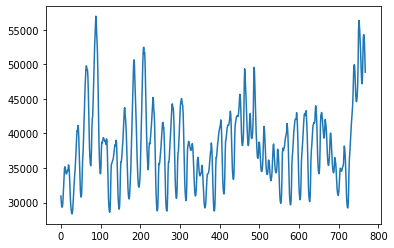

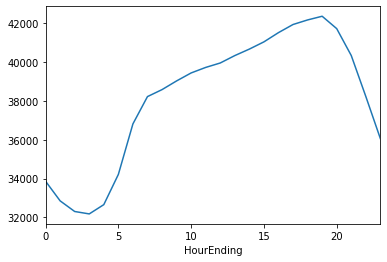

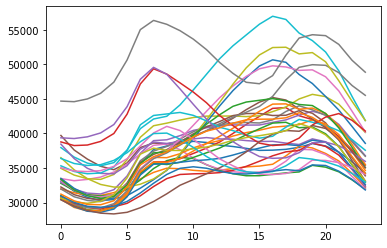

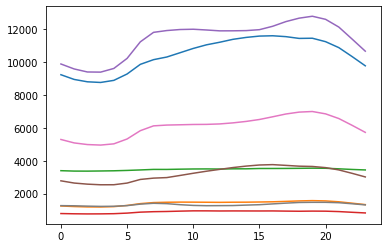

In [61]:
regions = ['COAST','EAST','FAR_WEST','NORTH','NORTH_C','SOUTHERN','SOUTH_C','WEST']

HourlyLoad.HourEnding=HourlyLoad.HourEnding-1

SortedHourlyLoad=HourlyLoad.groupby(['OperDay','HourEnding']).mean()
AvgHourlyLoad=HourlyLoad.groupby(['HourEnding']).mean()

if PLOT_FLAG:
    plt.figure()
    plt.plot(SortedHourlyLoad['TOTAL'].values)

    plt.figure()
    AvgHourlyLoad['TOTAL'].plot()
    plt.figure()
    for myday in HourlyLoad['OperDay'].unique():
        dayload=SortedHourlyLoad.loc[myday]
        plt.plot(dayload['TOTAL'].values)
    plt.figure()
    for myregion in regions:
        plt.plot(AvgHourlyLoad[myregion].values)

In [62]:

HourlyLoad['ts']=HourlyLoad.OperDay+' '+HourlyLoad.HourEnding.map(str)+':00'
HourlyLoad['ts']

HourlyLoad['ts']=pd.to_datetime(HourlyLoad['ts'])
HourlyLoad.set_index(['ts'],inplace=True)

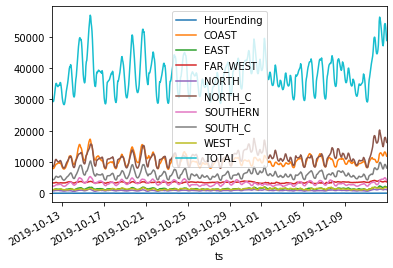

In [63]:
if PLOT_FLAG:
    HourlyLoad.plot()

In [67]:
#Pickle road graph
output = open(os.path.join(cwd,'LoadsByRegion.pkl'), 'wb')
pickle.dump(AvgHourlyLoad, output)
output.close()



# Extract just coast data for Puerto Rico

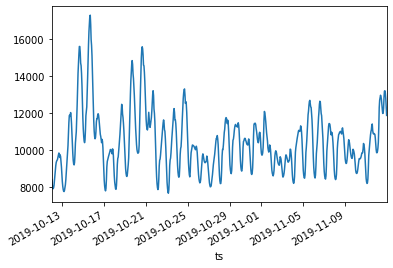

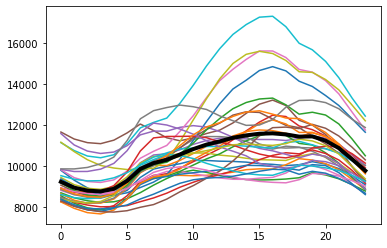

In [68]:
if PLOT_FLAG:
    plt.figure()
    HourlyLoad['COAST'].plot()
    plt.figure()
    for myday in HourlyLoad['OperDay'].unique():
        dayload=SortedHourlyLoad.loc[myday]
        plt.plot(dayload['COAST'].values)
    plt.plot(AvgHourlyLoad['COAST'].values,linewidth=4,color='k')

np.save(os.path.join(cwd,'TexasCoastAvgDayLoad.npy'),AvgHourlyLoad['COAST'].values)
    